In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/tweets/task.csv")
df

,Id,Tweet,Emotion,Intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
7092,41528,Why does Candice constantly pout #GBBO 💄😒,sadness,0.396
7093,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,0.604
7094,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness,0.479
7095,41531,I'm buying art supplies and I'm debating how s...,sadness,0.375


In [3]:
df.head()

,Id,Tweet,Emotion,Intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         7097 non-null   int64  
 1   Tweet      7097 non-null   object 
 2   Emotion    7097 non-null   object 
 3   Intensity  7097 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.9+ KB


In [5]:
df.isnull().sum()

Id           0
Tweet        0
Emotion      0
Intensity    0
dtype: int64

In [6]:
df.duplicated().sum()

0

*PREPROCESSING*

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
# Data preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

text="How the fu*k! Who the heck! moved my fridge!.....	"
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing, removing punctuation, and removing stopwords
    clean_tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
df["Tweet"]=df["Tweet"].apply(preprocess_text)

In [9]:
df["Tweet"]

0       fu k heck move fridg knock landlord door angri...
1       indian uber driver call someon n word move veh...
2       ask parcel deliv pick store address fume poorc...
3       ef whichev butt wipe pull fire alarm davi bc s...
4       join btcare put phone talk rude take money acc...
                              ...                        
7092                          candic constantli pout gbbo
7093    unhappi redbu cc talk week still initi refund ...
7094    aceoperative789 pull afew week ago sadli there...
7095          buy art suppli debat seriou buy acryl paint
7096    sainsburi could ask chafford hundr store turn ...
Name: Tweet, Length: 7097, dtype: object

In [10]:
!pip install emoji
import emoji
txt="Why does Candice constantly pout #GBBO 💄😒 "
def emojis(txt):
  return emoji.demojize(txt).replace(":","")
print(emojis(txt))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 8.7 MB/s eta 0:00:00
Why does Candice constantly pout #GBBO lipstickunamused_face 


In [11]:
df['Tweet']=df['Tweet'].apply(emojis)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

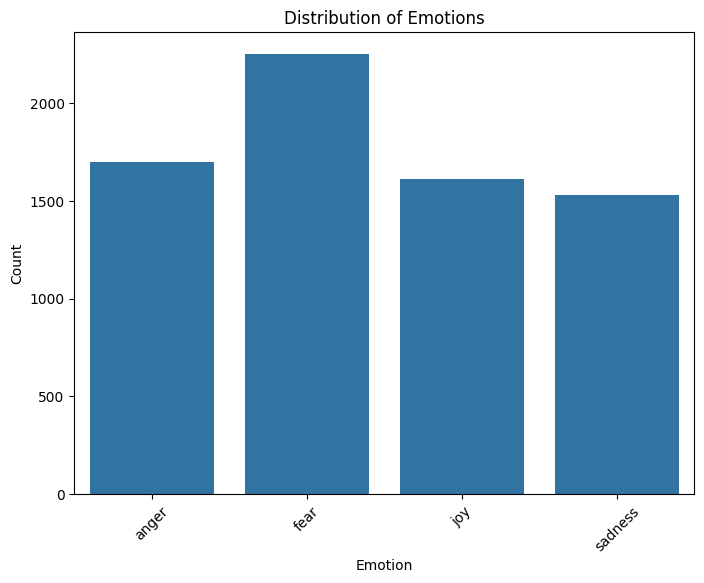

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

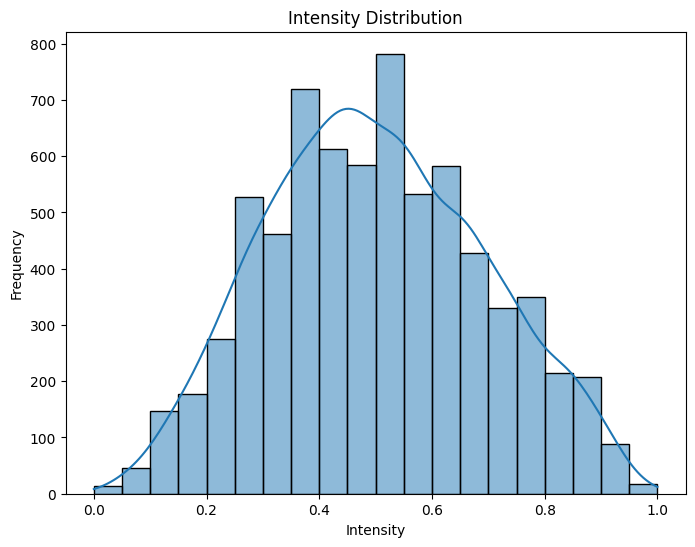

In [14]:
# Intensity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Intensity'], bins=20, kde=True)
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

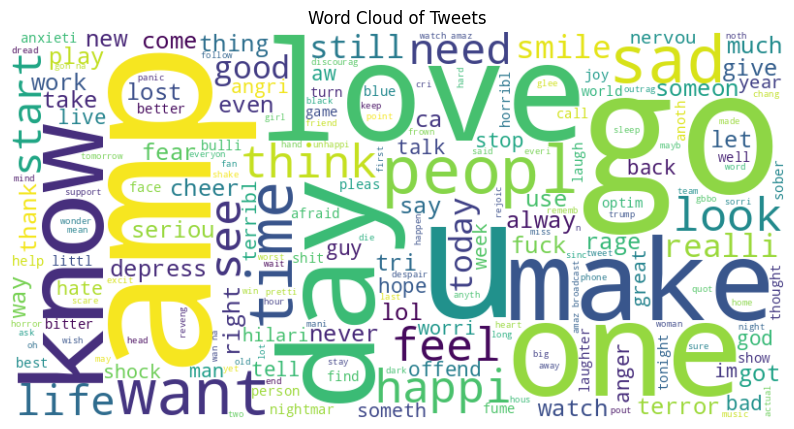

In [15]:
text = ' '.join(df['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

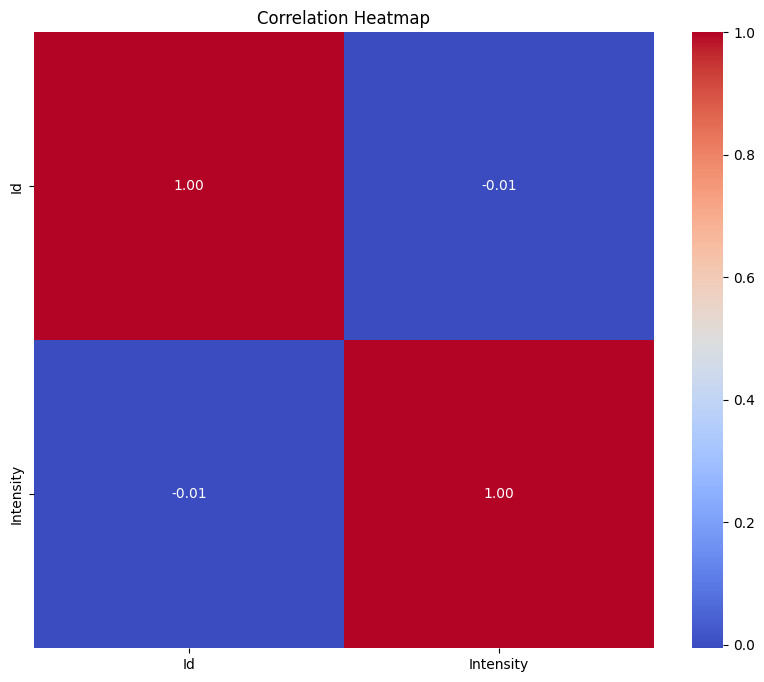

In [16]:
# Correlation Heatmap (assuming you have numerical features)
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
data=tfidf.fit_transform(df['Tweet']).toarray()
y=df[['Emotion','Intensity']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['Emotion']=le.fit_transform(y[['Emotion']])
y['Emotion']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-13-90b8801fe146>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Emotion']=le.fit_transform(y[['Emotion']])


0       0
1       0
2       0
3       0
4       0
       ..
7092    3
7093    3
7094    3
7095    3
7096    3
Name: Emotion, Length: 7097, dtype: int64

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,y[['Emotion']],test_size=0.4)

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
model.score(X_test,Y_test)

0.6301514617823177

In [ ]:
model=BernoulliNB()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
model.score(X_test,Y_test)

0.7041211694258541

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

<ipython-input-21-dd6904a9d931>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
model.score(X_test,Y_test)

0.8457203240577669

In [ ]:
model=SVC()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
model.score(X_test,Y_test)

0.835153222965833

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,y[['Intensity']])

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

<ipython-input-26-bc70f17761e9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestRegressor()

In [ ]:
model.score(X_test,Y_test)

0.15110066393379074

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

In [ ]:
model.score(X_test,Y_test)

0.835153222965833

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

In [ ]:
model.score(X_test,Y_test)

0.7041211694258541

In [ ]:
# Model evaluation
y_pred = model.predict(X_test,Y_test)
mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.030438605723301863
